# Baseline Kernel
K-Fold LGBM carried out with no feature engineering, as a baseline of comparison. Issues fixed. 

## Imports

In [335]:
import pandas as pd
import lightgbm as lgb
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import KFold
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score as acc
from scipy.stats import hmean 
from numpy import argmax
from sklearn.metrics import roc_auc_score as ras

## Reading Data
#### ...and some simple analysis.

In [254]:
df_test=pd.read_csv('test.csv')
df_train=pd.read_csv('train.csv')

In [255]:
#checking for null values
df_train.isnull().values.any()

False

In [256]:
df_train.shape

(31649, 18)

In [257]:
df_test.shape

(13562, 17)

In [258]:
df_test.head()

,serial_number,age_in_years,job_description,marital_status,education_details,has_default,balance_in_account,housing_status,previous_loan,phone_type,date,month_of_year,call_duration,campaign_contacts,days_passed,previous_contact,poutcome_of_campaign
0,1,33,admin.,married,secondary,no,796,yes,no,telephone,6,apr,216,1,-1,0,unknown
1,2,40,management,married,secondary,no,754,no,yes,cellular,6,apr,635,1,-1,0,unknown
2,3,30,technician,single,secondary,no,10152,yes,no,cellular,6,apr,1108,2,270,1,failure
3,4,44,blue-collar,married,secondary,no,545,yes,no,cellular,6,apr,122,3,136,1,failure
4,5,35,technician,married,secondary,no,5553,yes,no,cellular,6,apr,371,3,136,7,failure


In [259]:
df_train.head()

,serial_number,age_in_years,job_description,marital_status,education_details,has_default,balance_in_account,housing_status,previous_loan,phone_type,date,month_of_year,call_duration,campaign_contacts,days_passed,previous_contact,poutcome_of_campaign,outcome
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


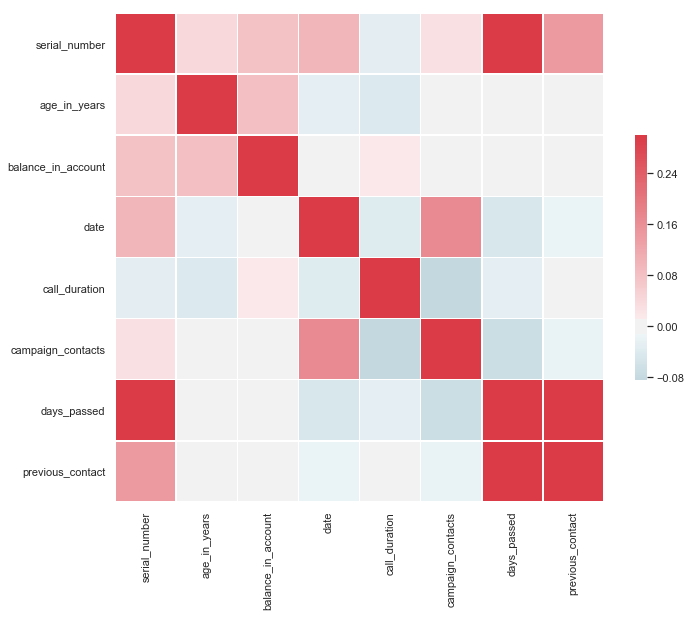

In [260]:
sns.set(style="white")
corr = df_train.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

### Feature Engineering

Will do feature preprocessing & engineering later.

### Identifying Categorical Columns

In [261]:
categs=[]
for col in df_train:
    count=df_train[col].drop_duplicates().shape[0]
    print(col,':',count)
    if count<=12:
        categs.append(col)
print(categs)


serial_number : 31649
age_in_years : 67
job_description : 12
marital_status : 3
education_details : 4
has_default : 2
balance_in_account : 6405
housing_status : 2
previous_loan : 2
phone_type : 3
date : 31
month_of_year : 11
call_duration : 1469
campaign_contacts : 48
days_passed : 243
previous_contact : 31
poutcome_of_campaign : 4
outcome : 2
['job_description', 'marital_status', 'education_details', 'has_default', 'housing_status', 'previous_loan', 'phone_type', 'month_of_year', 'poutcome_of_campaign', 'outcome']


In [262]:
df_train[categs].head()

,job_description,marital_status,education_details,has_default,housing_status,previous_loan,phone_type,month_of_year,poutcome_of_campaign,outcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


## Data separation

In [263]:
frame_sno = df_test['serial_number'] #serial numbers
frame_train_target = pd.DataFrame(df_train['outcome']) #Y of train
frame_train = df_train.drop(['outcome','serial_number'], axis = 1) #X array of train
frame_test = df_test.drop(['serial_number'], axis = 1) #testdata array
frame_test.shape

(13562, 16)

## Encoding [discontinued and borrowed from ninja]
### One Hot Encoding Categorical Values
Ignore the commented code, I drank a lot of dumb bich juice

In [78]:
#onehot_encoder = OneHotEncoder(sparse=False)

#### Training data

In [341]:
"""
for col in frame_train:
    if col in categs:
        vals=frame_train[col].values
        #print(vals)
        vals = vals.reshape(len(vals), 1)
        onehot_encoded = onehot_encoder.fit_transform(vals)
        #print(onehot_encoded)
        frame_train[col]=onehot_encoded
        """

'\nfor col in frame_train:\n    if col in categs:\n        vals=frame_train[col].values\n        #print(vals)\n        vals = vals.reshape(len(vals), 1)\n        onehot_encoded = onehot_encoder.fit_transform(vals)\n        #print(onehot_encoded)\n        frame_train[col]=onehot_encoded\n        '

In [351]:
"""frame_train.head()"""

'frame_train.head()'

#### Testing data

In [343]:
"""
for col in frame_test:
    if col in categs:
        vals=frame_test[col].values
        #print(vals)
        vals = vals.reshape(len(vals), 1)
        onehot_encoded = onehot_encoder.fit_transform(vals)
        #print(onehot_encoded)
        frame_test[col]=onehot_encoded"""

'\nfor col in frame_test:\n    if col in categs:\n        vals=frame_test[col].values\n        #print(vals)\n        vals = vals.reshape(len(vals), 1)\n        onehot_encoded = onehot_encoder.fit_transform(vals)\n        #print(onehot_encoded)\n        frame_test[col]=onehot_encoded'

In [344]:
"""frame_test.head()"""

'frame_test.head()'

#### Target
*Using label encoding here, not one hot*

In [345]:
"""label_encoder = LabelEncoder()"""

'label_encoder = LabelEncoder()'

In [346]:
"""
for col in frame_train_target:
    if col in categs:
        vals=frame_train_target[col].values
        #print(vals)
        #vals = vals.reshape(len(vals))
        label_encoded = label_encoder.fit_transform(vals)
        #print(onehot_encoded)
        frame_train_target[col]=label_encoded"""

'\nfor col in frame_train_target:\n    if col in categs:\n        vals=frame_train_target[col].values\n        #print(vals)\n        #vals = vals.reshape(len(vals))\n        label_encoded = label_encoder.fit_transform(vals)\n        #print(onehot_encoded)\n        frame_train_target[col]=label_encoded'

In [347]:
"""frame_train_target.drop_duplicates()"""

'frame_train_target.drop_duplicates()'

## Adopting Ninjarao's Encoding

### Target Variable

In [264]:
encoder= LabelEncoder()
dataset_encoded= encoder.fit_transform(frame_train_target['outcome'])
dataset_encoded
frame_train_target['outcome']=dataset_encoded


In [265]:
frame_train_target.drop_duplicates()

,outcome
0,0
83,1


### Binary features

In [266]:
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in frame_train:
    if frame_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(frame_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(frame_train[col])
            # Transform both training and testing data
            frame_train[col] = le.transform(frame_train[col])
            frame_test[col] = le.transform(frame_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)


3 columns were label encoded.


### One hot for other categoricals

In [267]:
frame_train = pd.get_dummies(frame_train)#One hot encoding(Prolly better ways of doing this)
frame_test = pd.get_dummies(frame_test)

train_labels = frame_train_target
# Align the training and testing data, keep only columns present in both dataframes
frame_train, frame_test = frame_train.align(frame_test, join = 'inner', axis = 1)

# Add the target back in
#frame_train['outcome'] = train_labels

print('Training Features shape: ', frame_train.shape)
print('Testing Features shape: ', frame_test.shape)



Training Features shape:  (31649, 47)
Testing Features shape:  (13562, 47)


### Viewing

In [268]:
#frame_train

## Conversion into arrays for K-Fold

In [269]:
sno = frame_sno.values 
train_target = frame_train_target.values
train = np.array(frame_train) 
test = np.array(frame_test) 
frame_train.shape

(31649, 47)

## K-Fold LGBM

In [320]:
K=10
kf = KFold(n_splits=K, random_state=42)

lscore_preds=[] #holds predictions made for scoring
lgb_preds=[] #will hold the k folds of predictions
lscores=[] #will hold accuracy score of each fold
laucs=[] #will hold AUC score of each fold
y_tests=[] #will be used for averaging model predictions later 

param_dist = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'learning_rate': 0.035,
    'metric': ['auc'],
    'is_training_metric' : True,
    'tree_leaner': 'data',
    'feature_fraction_seed' : 42,
    'verbose':0,
    'feature_fraction':0.85,
    'bagging_fraction': 0.45,
    'bagging_freq':7,
    # 'bagging_seed': 42,
    'l2_lambda':14,
    #'l1_lambda': 16,
    'num_leaves': 1024,
    'min_data_in_leaf':40,
    'min_gain_to_split':1,
    # 'max_bin' :300
} 

for train_index, test_index in kf.split(train, train_target):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = train[train_index], train[test_index]
    y_train, y_test = train_target[train_index].flatten(), train_target[test_index].flatten()
    
    
    
    
    #LGBM
    lgb_train = lgb.Dataset(X_train, y_train, free_raw_data=True)
    lgb_val = lgb.Dataset(X_test, y_test, reference=lgb_train, free_raw_data=True)

    #lmodel = lgb.train(param_dist,
    #                lgb_train,
    #                num_boost_round = 40,
    #                valid_sets = lgb_val,
    #                early_stopping_rounds=12)
    
    lmodel=lgb.LGBMClassifier(n_estimators=400)
    lmodel.fit(X_train, y_train)
    
    lgb_pred = lmodel.predict_proba(test)[:,1]
    lgb_preds.append(lgb_pred)

    lscore_pred = lmodel.predict_proba(X_test)[:,1]
    #scoring
    lscore_preds.append(list(lscore_pred))
    
    lrounded = np.array(lscore_pred)
    #print(lrounded)
    mid=0.5
    lrounded[lrounded >= mid] = 1
    lrounded[lrounded < mid] = 0
    #print(lrounded)
    
    score=acc(y_test, lrounded)
    auc=ras(y_test,lscore_pred)
    y_tests.append(list(y_test))
    print('Score: ', score)
    print('AUC score: ', auc)
    lscores.append((score))
    laucs.append(auc)

TRAIN: [ 3165  3166  3167 ... 31646 31647 31648] TEST: [   0    1    2 ... 3162 3163 3164]
Score:  0.9699842022116903
AUC score:  0.960876805827871
TRAIN: [    0     1     2 ... 31646 31647 31648] TEST: [3165 3166 3167 ... 6327 6328 6329]
Score:  0.958609794628752
AUC score:  0.958970479437958
TRAIN: [    0     1     2 ... 31646 31647 31648] TEST: [6330 6331 6332 ... 9492 9493 9494]
Score:  0.9554502369668246
AUC score:  0.9529201809069796
TRAIN: [    0     1     2 ... 31646 31647 31648] TEST: [ 9495  9496  9497 ... 12657 12658 12659]
Score:  0.9620853080568721
AUC score:  0.9544823371226011
TRAIN: [    0     1     2 ... 31646 31647 31648] TEST: [12660 12661 12662 ... 15822 15823 15824]
Score:  0.939652448657188
AUC score:  0.9497161624153825
TRAIN: [    0     1     2 ... 31646 31647 31648] TEST: [15825 15826 15827 ... 18987 18988 18989]
Score:  0.9541864139020537
AUC score:  0.953519191919192
TRAIN: [    0     1     2 ... 31646 31647 31648] TEST: [18990 18991 18992 ... 22152 22153 221

##### Averaging Score

In [321]:
print('Accuracy: ', sum(lscores)/K)
print('AUC: ', sum(laucs)/K)

Accuracy:  0.9426182886861074
AUC:  0.918726480652173


##### Averaging K-Fold Predictions

In [322]:
for i in lgb_preds:
    print(i[1])

0.07119620768025213
0.17854395428680458
0.07966088949926312
0.14807607254280825
0.03135292465410466
0.15436606518140497
0.10094781950278747
0.16643271351845337
0.11800007679269606
0.18999961425207199


In [323]:
for i in lgb_preds:
    print(i[i<=0])

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [324]:
lavg= hmean(lgb_preds)
for val in lavg:
    print(val)


0.0024327987294398747
0.09347682177538635
0.5147399975690291
0.000307733130645038
0.0070622483358001465
0.004276974437404925
6.97210582623106e-05
0.3857915393062772
0.0024961580067826275
0.005659779661621781
0.002416551448708338
0.3889544842746994
0.2801217049745685
0.27493920730294563
0.09044426028513483
0.0004994837937722722
0.00042963262725014033
0.006433276569733294
0.0024252681557151066
0.0003525421940590758
0.00030931342606975074
0.02775973579216503
0.0003345545376812726
0.09566891462221969
0.0028194932790028063
0.00014469880925900282
0.00015109840875748693
0.0510900013463145
0.0011333883656364516
0.002999554738972316
0.00040015663306184923
0.4160100944677308
0.7649275532725711
0.0006675319161206345
0.0028899414729100675
0.005434433645523931
0.00017606760903735654
0.009601585695627532
0.0003554556361032902
0.0016998922340860285
0.0008068537244510104
0.01109304801211847
0.08047662557982098
0.004451011749822758
0.0013704532621732339
0.001574482151717014
0.00082155845979669
0.002162

0.00013947799264578078
0.002011641694699503
1.5701979910870093e-05
0.0014261393283997038
0.01895752717506537
0.00014903052506359853
0.0006662504579803246
9.503202601372186e-05
0.00017445588624963397
0.0012870332122560295
0.0017682687044226371
4.713257635746498e-05
9.297944677549497e-05
0.001410040287313703
0.0007805439760708273
8.680141182673581e-05
0.0002464449046085676
0.0014142736944158646
0.019056208613891176
0.0015261674186655204
0.00034135481670898596
0.20392694679967596
0.019503903515694615
0.0027684936299666343
0.0003998309919602748
0.0002342798867508944
0.0008824998604658391
0.11691499770487622
0.0008697546986619141
0.1530453963595081
2.3660192473185248e-05
0.00011806550157029458
0.42450562796818003
0.014262204369733108
0.015407863955180323
0.018567677454754593
0.08241323605254385
0.0007255325586570088
0.0006558731283238814
3.2468364743194525e-05
0.008397440784642251
0.0010986662182072902
0.00014273535463871725
0.001503249347175796
9.461784655001807e-05
0.00030697560546452164


9.208334829335896e-06
0.007235884282399847
6.230251237988432e-05
0.0028640621882689335
3.433670571896365e-05
0.00036850685405137275
1.882218976764856e-05
3.84031009778373e-05
3.442822428547073e-05
7.988134175928911e-05
0.00019806244534764127
1.5806529483738176e-05
7.5268120137698834e-06
7.042445171618124e-06
1.775379916492218e-05
1.8505071103395754e-05
4.026496045466696e-05
4.233213405700075e-06
6.397622940501209e-06
0.009303972784544604
3.436240202450728e-05
1.0404675855817835e-05
0.0001457568912470778
0.00010994507237134034
0.04382405766641775
0.00013322464863653314
0.06157552732384983
0.7318692040374946
7.0525041991357585e-06
0.0003281932517031721
0.00016252111295811478
1.3523477564408687e-05
3.5388166499093024e-05
1.6924885708302398e-05
2.570792829361662e-05
7.178725735779346e-05
8.149127522899339e-06
0.001017425438427066
1.895107530911292e-05
0.00010782397151867908
5.1698679321136106e-05
8.297193553553033e-05
0.0001274673859044461
0.00012652618729923706
7.909484032508295e-05
4.367

1.4718906989610312e-05
0.00011830396041272783
0.0035541661821384333
0.0007421200042321657
1.640872612138162e-05
0.00018279953935108895
8.396332163625663e-05
2.604109842631592e-05
0.00011482981794607652
0.00015410426076801844
1.1228580215560608e-06
0.0001186248449532887
0.00022463709849884246
3.125348599128161e-05
0.00010279824168897218
1.6016515633989554e-05
7.889271980978383e-05
0.0001277137517988782
4.718669365515185e-06
0.00028362452488510896
1.8636589863478597e-05
0.0002772342238451305
0.0001912122986822791
1.8389377139579663e-05
2.0528082013002584e-06
9.880966066177642e-06
7.900600936734822e-06
3.5328060095198516e-05
1.2970622994370365e-05
0.0001640878158053135
1.048905317179414e-05
4.8689273204708945e-05
5.913802084511972e-06
5.980249880142831e-05
0.00044604784754277856
0.00014868766860593767
8.252900121021851e-05
3.233648443801586e-06
6.087792118593134e-05
0.000157463916305353
0.0001102860002304765
6.183963803990089e-05
0.06922576172340825
0.004341388694269674
4.138033635615005e

6.59469809911889e-05
3.5622080110675313e-06
3.6431241730589536e-05
0.0010824458238136163
0.823530703122299
4.812659236966125e-05
2.1375083902893406e-05
3.0285459464376934e-05
0.0001446862121888654
1.316089315570406e-05
0.01222808462020467
1.5754925855884525e-05
4.1200037168179604e-05
0.13514276503810563
1.920057704590981e-05
7.092639560473697e-06
4.0892001826153587e-07
0.00012553149628217756
2.5435600622380483e-06
0.009411425030353257
0.0022126372522110103
2.6006692075742795e-05
1.9273355586835537e-06
7.78141227403846e-05
9.575941285971784e-07
1.1088567544134987e-05
2.7588369370424586e-06
2.9136012101946453e-05
2.0488766329920895e-05
0.00013270503826122828
1.8259166681526436e-05
2.514741550978826e-06
0.01739380701708608
2.6809235354846303e-05
1.4894721108917679e-05
3.694587337768111e-05
5.5454220853194854e-06
3.427429399526455e-05
6.022843268933596e-06
9.338217207004466e-06
7.1702104571114e-05
1.0621231441733885e-05
7.585849888033013e-06
0.00019981644308537136
1.0413664485538094e-05
3.

1.037889479080163e-05
0.10601517868377275
0.007816662080134162
1.609905196985495e-06
0.01762064232225544
5.215782474526862e-06
9.242068692030766e-05
8.198058344159263e-07
7.805765485993285e-06
3.9772895568786954e-05
2.0468653932248034e-05
0.003961265097662031
3.7538005756420675e-06
9.18797985643047e-06
8.314951620913958e-06
0.0003797903804565259
1.3801380089063995e-05
0.00016709522976431594
0.00026783948741134096
6.129433585518965e-05
7.946236549118707e-05
0.00013164976194301155
2.4942449240066764e-06
0.44761890087010414
8.555386748978952e-06
5.1555082590955264e-05
7.806031140917007e-06
1.599734150500266e-06
7.615387302468068e-05
3.858785835656816e-06
8.129749368039475e-06
0.00011416868707328052
3.328037815716996e-06
6.114142431775245e-06
0.23644833977751484
9.046365155681437e-07
1.9449450977882694e-06
3.7634061731667555e-06
3.011655895212615e-06
7.464107065178232e-05
0.05719465404004308
1.504505351754899e-05
5.3970580710710726e-05
6.018161808122179e-07
4.3785188835036646e-05
0.2555495

0.007110371440363899
0.24203707911460556
2.3419220221626614e-05
0.07561149580876453
0.0017083953956166065
0.0001467175934878794
0.0007523284935022376
0.001296508772162222
4.766598063278741e-05
0.0003291455755945138
0.0011644185587633298
0.0007191416153423134
0.00029211927329991517
3.08647678269196e-05
0.0022448129758484326
0.0007321606633051033
0.001271310145971001
0.0016042144102700073
0.00031052412487449465
0.007926575252605607
0.00011409302254935216
0.0002523997533364912
0.8203681014081025
0.0014131690087962378
0.00011512748417830034
0.0010318393160209502
4.851416457389609e-05
0.00020692025512203846
0.23246283573509577
0.0004372163250165109
0.14059993861405107
0.06112623524644415
0.00041037579180839054
1.3210255028317007e-05
0.15179480407829327
0.0002953726087949463
0.0015068861012983127
0.005959450893732013
0.00019342385187094384
0.0026790882407407616
0.0006214471143383409
0.00038802043118836305
0.0016608102565894112
0.00010990892086457332
0.006809300990871934
0.8768918899137856
0.

0.006484937719035412
0.0018486830538487512
0.0004727185571343623
0.002441455683124063
0.021075585150094844
0.1913878532093664
0.00035062159616694677
0.24844104593116978
0.0004446978905183913
0.05831609645476138
0.07475571127594682
0.001086542696330495
0.004048026707504926
0.04767846681523819
0.09461640657509814
0.0009656147114903523
0.016247773261110515
0.00856123474515681
0.41932884923815555
0.007027150717973364
0.6027245600259266
0.0021401925408759855
0.776840200569124
0.0022208844045608317
0.0010044657356192796
0.00028440358846023027
0.007557456428131515
0.0020547162135858134
0.42838814583737045
0.015042764448249724
0.000750892004569648
0.010674191041088413
0.004335932181695777
0.0001629630279414237
0.12714086968241056
0.0002716110118632455
7.91421243301491e-05
0.0009062292998679813
0.0003353664091452748
0.00043845563241187154
0.002964905007838287
0.002734261535191857
0.0014281348481575376
0.6592238482937551
0.00047188309573046824
0.11000228552585195
0.0012714394576561763
0.00227569

3.0220137275957673e-05
0.1966614577123518
0.4907902437037213
0.010770951062989339
1.9473450781889414e-05
3.230745227755587e-05
0.008554178668565473
0.2295667924562939
1.4314764759461867e-05
1.7405484432261087e-05
1.2519779374753989e-05
0.00022269986810928723
0.00015189757696628544
0.040019230872818466
0.00010710382624476772
0.00013888566165614046
2.6755198214352826e-05
0.00549731179480311
0.07455131735247075
9.294032181828148e-05
0.056376799267266964
1.7085755687263545e-05
3.3521069388851266e-05
0.08599479753218013
0.39519072062942406
6.0962066139041865e-05
4.880490893750141e-05
0.21814505371681892
3.448217065790868e-05
0.7093869199200347
4.656941181034626e-05
0.00030748951371008785
4.1697280925141826e-07
0.00015832807549902045
0.5938979651300239
0.0009583142098605961
0.04116195512012063
0.0008699687003385596
0.00047303328010273504
0.010264380136253392
5.617520437969592e-05
0.0058576399106024715
0.09334282227849203
2.4553263683928567e-05
1.5473961913230654e-05
3.1147039253246e-05
0.005

## Preparing the submission

##### Rounding averaged values & decoding

In [325]:
lsub = np.array(lavg)

In [326]:
print(lsub)

[0.0024328  0.09347682 0.51474    ... 0.21133957 0.03944972 0.0014934 ]


In [327]:
#no longer valid
ones=np.sum(lsub)/len(lsub) 
1-ones #checking what percentage of output is 0

0.9574332055433549

In [328]:
mid=0.5
lsub[lsub >= mid] = 1
lsub[lsub < mid] = 0

In [329]:

sub=pd.DataFrame({'outcome':lsub})


In [330]:
sub[sub['outcome']==1.0]='yes'
sub[sub['outcome']==0.0]='no'
sub.drop_duplicates()

,outcome
0,no
2,yes


In [331]:
sub[sub['outcome']=='no'].shape[0]/sub.shape[0] #percentage of no

0.9784692523226662

In [332]:
sub['serial_number']=sno
sub=sub[['serial_number','outcome']]

In [333]:
sub.head()

,serial_number,outcome
0,1,no
1,2,no
2,3,yes
3,4,no
4,5,no


In [334]:
sub.to_csv("sub_lgbm.csv", index=False)